In [55]:
#importing all the package you need (for Analysis)
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
from sklearn.preprocessing import StandardScaler

# Titanic Project

#Data Cleansing

#### 1. Data Description

In [2]:
# We can use the pandas library in python to read in the csv file.
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("train.csv")
# Print the first 5 rows of the dataframe.
print(titanic.head(5))
#print titanic.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
#describe it
print(titanic.describe(),'\n')
print(titanic.dtypes)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   

PassengerId      int64
Survived         int64
Pclass           int64
Name      

We have 7 numeric and 5 string/object. We will change it in the future.

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have many missing value on Age and Cabin. We have to deal with it first

#### 2. Data Imputation

In [5]:
#Age

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic['family_size']=titanic.SibSp+titanic.Parch+1
titanic['family_name']=titanic.Name.apply(lambda x : x.split(',')[0])
titanic['title_name']=titanic.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_name,title_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Allen,Mr


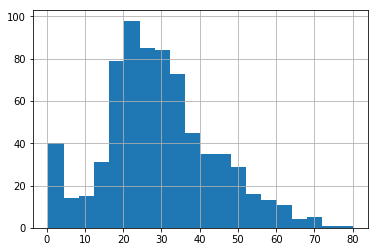

In [8]:
titanic_age_exist=titanic[~(titanic.Age.isnull())]
titanic_age_exist.Age.hist(bins=20)

In [9]:
mean_age_title=pd.pivot_table(titanic,values='Age',index=["Sex"],columns="title_name",aggfunc='mean',fill_value=0)
number_age_title=pd.pivot_table(titanic,values='Age',index=["Sex"],columns="title_name",aggfunc='count',fill_value=0)

In [10]:
sex_age_title=pd.pivot_table(titanic,values='Age',index=["Sex"],aggfunc='mean',fill_value=0)
sex_age_title

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [11]:
mean_age_title['Mr']['male']

32.368090452261306

In [12]:
# pd.pivot_table(titanic,values='Age',index=["family_name"],columns="Sex",aggfunc='count',fill_value=0)

In [13]:
id_list=titanic[(titanic.Age.isnull())].PassengerId.tolist()

In [14]:
age_nan=[]
for idl in id_list:
    pass_age=[idl]
    element=titanic[titanic.PassengerId==idl][['Sex','title_name']].as_matrix()[0]
    if number_age_title[element[1]][element[0]]!=0:
        pass_age.append(mean_age_title[element[1]][element[0]])
    else:
        pass_age.append(sex_age_title[element[0]])
    age_nan.append(pass_age)

In [15]:
fill_age=pd.DataFrame(age_nan,columns=['PassengerId','fill_age_nan'])
new_titanic=pd.merge(titanic,fill_age,on='PassengerId',how='left')

In [16]:
new_titanic.Age=new_titanic.Age.fillna(0)
new_titanic.fill_age_nan=new_titanic.fill_age_nan.fillna(0)
new_titanic['new_age']=new_titanic.Age+new_titanic.fill_age_nan

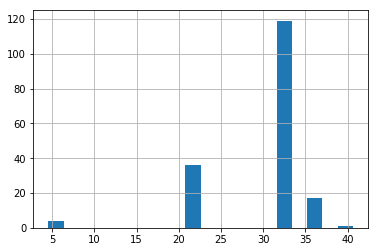

In [17]:
new_titanic_age_exist=new_titanic[~(new_titanic.Age!=0)]
new_titanic_age_exist.new_age.hist(bins=20)

In [18]:
new_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_name,title_name,fill_age_nan,new_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,Mr,0.00000,22.00000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Cumings,Mrs,0.00000,38.00000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Heikkinen,Miss,0.00000,26.00000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Futrelle,Mrs,0.00000,35.00000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Allen,Mr,0.00000,35.00000
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,NaN,Q,1,Moran,Mr,32.36809,32.36809
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,McCarthy,Mr,0.00000,54.00000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Palsson,Master,0.00000,2.00000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Johnson,Mrs,0.00000,27.00000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,Nasser,Mrs,0.00000,14.00000


In [19]:
new_titanic.Cabin=new_titanic.Cabin.fillna('-')
new_titanic['class_of_cabin']=new_titanic.Cabin.apply(lambda x: x[0])
new_titanic['cabin_count']=new_titanic.Cabin.apply(lambda x: len(x.split(' ')))
# new_titanic['number_of_cabin']=new_titanic.Cabin.apply(lambda x: x[1:])

In [20]:
new_titanic['update_fare']=new_titanic.Fare/new_titanic.cabin_count

In [21]:
#cek embarked, fares, and cabin
new_titanic_w_cabin=new_titanic[new_titanic.Cabin!='-']
mean_fares=pd.pivot_table(new_titanic_w_cabin,values='update_fare',index=["Embarked"],columns="class_of_cabin",aggfunc='mean',fill_value=0)
mean_fares


class_of_cabin,A,B,C,D,E,F,G,T
Embarked,,,,,,,,
C,38.357743,99.498741,93.165271,72.033350,92.905840,11.179150,0.00000,0.0
Q,0.000000,0.000000,90.000000,0.000000,12.350000,7.750000,0.00000,0.0
S,40.731763,74.792572,75.834377,46.047915,38.306731,18.315909,13.58125,35.5


In [22]:
def mean_wo(X):
    
    X=list(X)
    mean=np.mean(X)
    std=np.std(X)
    
    Xo=[]
    for x in X:
        if x<=mean+1.2*std and x>=mean-0.85*std:
            Xo.append(x)

    return np.mean(Xo)

def std_wo(X):
    
    X=list(X)
    mean=np.mean(X)
    std=np.std(X)
    
    Xo=[]
    for x in X:
        if x<=mean+std and x>=mean-std:
            Xo.append(x)

    return np.std(Xo)

new_titanic_w_cabin=new_titanic[new_titanic.Cabin!='-']
f_std=new_titanic_w_cabin.groupby('class_of_cabin').update_fare.std().fillna(0)
f_mean=new_titanic_w_cabin.groupby('class_of_cabin').update_fare.mean()
f_mean_s=new_titanic_w_cabin.groupby('class_of_cabin').agg({'update_fare':mean_wo}).update_fare
f_std_s=new_titanic_w_cabin.groupby('class_of_cabin').agg({'update_fare':std_wo}).update_fare


def pred_class(f,std_all=f_std_s,mean_all=f_mean_s):
    zval=np.abs((f-f_mean)/f_std)
    zval.sort()
    zval.drop(['G','T'])
    class_pred=zval.index[0]
    if zval[class_pred]>=1.5:
        try:
            if f>=10.4625 and f<=16.7:
                class_pred=='G'
            else:
                class_pred='T'
        except:
            print(type(f))
    return class_pred
# assume fare is normal for every class except G and T
# new_titanic_w_cabin.groupby('class_of_cabin').Fare.count()


In [23]:
def choose_cab(x):
    aa=x.split('_')
    if aa[0]=='-':
        return aa[1]
    else:
        return aa[0]

new_titanic['pred_cabin']=new_titanic.update_fare.apply(lambda x : pred_class(x))
new_titanic['cabin_pred_choose']=new_titanic['class_of_cabin']+'_'+new_titanic['pred_cabin']
new_titanic['new_cabin']=new_titanic.cabin_pred_choose.apply(lambda x: choose_cab(x))

del new_titanic['cabin_pred_choose']
del new_titanic['pred_cabin']

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [24]:
new_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,family_size,family_name,title_name,fill_age_nan,new_age,class_of_cabin,cabin_count,update_fare,new_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,2,Braund,Mr,0.00000,22.00000,-,1,7.2500,F
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,2,Cumings,Mrs,0.00000,38.00000,C,1,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,Heikkinen,Miss,0.00000,26.00000,-,1,7.9250,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,2,Futrelle,Mrs,0.00000,35.00000,C,1,53.1000,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,Allen,Mr,0.00000,35.00000,-,1,8.0500,F
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,...,Q,1,Moran,Mr,32.36809,32.36809,-,1,8.4583,F
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,1,McCarthy,Mr,0.00000,54.00000,E,1,51.8625,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,5,Palsson,Master,0.00000,2.00000,-,1,21.0750,F
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,3,Johnson,Mrs,0.00000,27.00000,-,1,11.1333,F
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,2,Nasser,Mrs,0.00000,14.00000,-,1,30.0708,E


#### 3. Good Columns

In [25]:
new_titanic.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'family_size',
 'family_name',
 'title_name',
 'fill_age_nan',
 'new_age',
 'class_of_cabin',
 'cabin_count',
 'update_fare',
 'new_cabin']

In [26]:
goodcol=['Survived','Pclass',
 'Sex',
 'Age',
 'Embarked',
 'family_size',
 'new_age',
 'update_fare',
#     'Fare',
#  'cabin_count',
 'new_cabin']

In [27]:
new_titanic2=new_titanic[goodcol]

In [28]:
new_titanic2.head()

,Survived,Pclass,Sex,Age,Embarked,family_size,new_age,update_fare,new_cabin
0,0,3,male,22.0,S,2,22.0,7.2500,F
1,1,1,female,38.0,C,2,38.0,71.2833,C
2,1,3,female,26.0,S,1,26.0,7.9250,F
3,1,1,female,35.0,S,2,35.0,53.1000,C
4,0,3,male,35.0,S,1,35.0,8.0500,F


In [29]:
#Now we work on non-numeric data
#Which also has missing values


#Sex doesn't has missing value
#Replace all the occurences of male with the number 0 and female with 1.
new_titanic2.loc[new_titanic2["Sex"] == "male", "Sex"] = 0
new_titanic2.loc[new_titanic2["Sex"] == "female", "Sex"] = 1

#Embarked columns has missing value
# print new_titanic2["Embarked"].unique()
new_titanic2.Embarked = new_titanic2.Embarked.fillna('S') # because most likely the passenger is 'S' 
new_titanic2.loc[new_titanic2.Embarked == "S", "Embarked"] = 0
new_titanic2.loc[new_titanic2.Embarked == "C", "Embarked"] = 1
new_titanic2.loc[new_titanic2.Embarked == "Q", "Embarked"] = 2



#Cabin columns has missing value
# print new_titanic2["Embarked"].unique()
new_titanic2.loc[new_titanic2.new_cabin == "A", "new_cabin"] = 0
new_titanic2.loc[new_titanic2.new_cabin == "B", "new_cabin"] = 1
new_titanic2.loc[new_titanic2.new_cabin == "C", "new_cabin"] = 2
new_titanic2.loc[new_titanic2.new_cabin == "D", "new_cabin"] = 3
new_titanic2.loc[new_titanic2.new_cabin == "E", "new_cabin"] = 4
new_titanic2.loc[new_titanic2.new_cabin == "F", "new_cabin"] = 5
new_titanic2.loc[new_titanic2.new_cabin == "G", "new_cabin"] = 6
new_titanic2.loc[new_titanic2.new_cabin == "T", "new_cabin"] = 7


new_titanic2['Pclass']=new_titanic2['Pclass'].astype('category')
#titanic.head(10)

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [30]:
new_titanic2.head()

,Survived,Pclass,Sex,Age,Embarked,family_size,new_age,update_fare,new_cabin
0,0,3,0,22.0,0,2,22.0,7.2500,5
1,1,1,1,38.0,1,2,38.0,71.2833,2
2,1,3,1,26.0,0,1,26.0,7.9250,5
3,1,1,1,35.0,0,2,35.0,53.1000,2
4,0,3,0,35.0,0,1,35.0,8.0500,5


#On to NN

In [31]:
#SOURCE :https://elitedatascience.com/keras-tutorial-deep-learning-in-python

%matplotlib inline
import numpy as np

#we'll import the Sequential model type from Keras. 
#This is simply a linear stack of neural network layers, and it's perfect for the type of feed-forward CNN we're building in this tutorial.
from keras.models import Sequential

#Next, let's import the "core" layers from Keras. 
#These are the layers that are used in almost any neural network:
from keras.layers import Dense, Dropout, Activation, Flatten

#Then, we'll import the CNN layers from Keras. 
#These are the convolutional layers that will help us efficiently train on image data:
from keras.layers import Convolution2D, MaxPooling2D

#Finally, we'll import some utilities. This will help us transform our data later:
from keras.utils import np_utils


from keras.datasets import mnist
from matplotlib import pyplot as plt
import idx2numpy
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
np.random.seed(123)

In [33]:
new_titanic2.head()

,Survived,Pclass,Sex,Age,Embarked,family_size,new_age,update_fare,new_cabin
0,0,3,0,22.0,0,2,22.0,7.2500,5
1,1,1,1,38.0,1,2,38.0,71.2833,2
2,1,3,1,26.0,0,1,26.0,7.9250,5
3,1,1,1,35.0,0,2,35.0,53.1000,2
4,0,3,0,35.0,0,1,35.0,8.0500,5


In [57]:
# x_data=new_titanic2[new_titanic2.columns.tolist()[1:]].as_matrix()
# y_data=new_titanic2[new_titanic2.columns.tolist()[:1]].as_matrix()

scaler = StandardScaler()
y_data = new_titanic2["Survived"]
y_data_hot=pd.get_dummies(y_data).values
x_data = new_titanic2.drop(["Survived"], axis = 1)
x_data=scaler.fit_transform(x_data.values)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_hot, test_size = 0.25, random_state = 123)

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [78]:
#Benchmark
y_data.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [82]:
#1 layer
start = time()

model = Sequential()
model.add(Dense(input_dim=8, output_dim=2))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, nb_epoch=30, verbose=1)

print('\ntime taken %s seconds' % str(time() - start))

Epoch 1/30
668/668 [==============================] - 0s - loss: 0.7176 - acc: 0.6033     
Epoch 2/30
668/668 [==============================] - 0s - loss: 0.6787 - acc: 0.6213     
Epoch 3/30
668/668 [==============================] - 0s - loss: 0.6470 - acc: 0.6677     

In [83]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.44379376990912739, 0.78475336055584555]


In [84]:
y_prediction = model.predict_classes(x_test)
y_test_nh=np.array([list(k).index(1) for k in y_test])
print("\n\naccuracy", np.sum(y_prediction == y_test_nh) / float(len(y_test_nh)))

 32/223 [===>..........................] - ETA: 0s

accuracy 0.784753363229


In [85]:
#2 layer
start = time()

model = Sequential()
model.add(Dense(input_dim=8, output_dim=150))
model.add(Dense(output_dim=2))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, nb_epoch=30, verbose=1)

print('\ntime taken %s seconds' % str(time() - start))

Epoch 1/30
668/668 [==============================] - 0s - loss: 0.7505 - acc: 0.5180     
Epoch 2/30
668/668 [==============================] - 0s - loss: 0.5850 - acc: 0.6946     
Epoch 3/30
668/668 [========

In [103]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.42447632765021559, 0.80717488521952263]


In [104]:
y_prediction = model.predict_classes(x_test)
y_test_nh=np.array([list(k).index(1) for k in y_test])
print("\n\naccuracy", np.sum(y_prediction == y_test_nh) / float(len(y_test_nh)))

223/223 [==============================] - 0s     


accuracy 0.807174887892


In [105]:
#2 layer
start = time()

model = Sequential()
model.add(Dense(input_dim=8, output_dim=150))
model.add(Dense(output_dim=150))
model.add(Dense(output_dim=2))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, nb_epoch=30, verbose=1)

print('\ntime taken %s seconds' % str(time() - start))

Epoch 1/30
668/668 [==============================] - 0s - loss: 0.6495 - acc: 0.6138      
Epoch 2/30
668/668 [==============================] - 0s - loss: 0.4921 - acc: 0.7754     

In [106]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.42545566697826298, 0.79820627535405175]


In [37]:
print('7-fold cross validation:\n')
for clf in model_t:
    m=str(clf)
    scores = cross_val_score(clf, x_data, y_data, cv=7, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), m.rsplit('(',1)[0]))

7-fold cross validation:

Accuracy: 0.6792 (+/- 0.0416) [KNeighborsClassifier]
Accuracy: 0.7935 (+/- 0.0222) [LogisticRegression]
Accuracy: 0.7969 (+/- 0.0224) [LogisticRegressionCV]
Accuracy: 0.7307 (+/- 0.0446) [LinearSVC]
Accuracy: 0.6904 (+/- 0.0376) [SVC]
Accuracy: 0.7723 (+/- 0.0318) [ExtraTreeClassifier]
Accuracy: 0.7813 (+/- 0.0524) [DecisionTreeClassifier]
Accuracy: 0.8216 (+/- 0.0319) [BaggingClassifier]
Accuracy: 0.8127 (+/- 0.0367) [RandomForestClassifier]
Accuracy: 0.8351 (+/- 0.0239) [GradientBoostingClassifier]
Accuracy: 0.8340 (+/- 0.0271) [GradientBoostingClassifier]
Accuracy: 0.8295 (+/- 0.0248) [GradientBoostingClassifier]
Accuracy: 0.8149 (+/- 0.0288) [AdaBoostClassifier]
